In [20]:
import nibabel as nb
import numpy as np
import scipy
from scipy import stats
import math
import pandas as pd
import statsmodels.api as sm
from ipynb.fs.full.utils import *

In [21]:
regressor_mean_magnitude_motion_vectors = np.load('E:/FPP_files_and_codes/FPP_files/dense_optical_flow_vectors/mean_magnitude_vectors_in_each_second.npy')
regressor_scene_transitions = np.load('E:/FPP_files_and_codes/FPP_files/scene_transition/regressor_absdif_intensity_pixels/regressor_mean_maxdif_pixel_intensitiy.npy')

In [22]:
delay = 4
shifted_regressor_mean_magnitude_motion_vectors = np.roll(regressor_mean_magnitude_motion_vectors, delay)
shifted_regressor_scene_transitions = np.roll(regressor_scene_transitions, delay)

In [23]:
left_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_left_Meanfile.mat')['Left_data']
right_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_right_Meanfile.mat')['Right_data']

In [25]:
def min_max_normalize(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)
    return normalized_arr

In [26]:
shifted_regressor_mean_magnitude_motion_vectors_minmax_normalized = min_max_normalize(shifted_regressor_mean_magnitude_motion_vectors)
shifted_regressor_scene_transitions_minmax_normalized =  min_max_normalize(shifted_regressor_scene_transitions)

In [27]:
shifted_regressor_mean_magnitude_motion_vectors_2d = shifted_regressor_mean_magnitude_motion_vectors_minmax_normalized.reshape(1, -1)
shifted_regressor_scene_transitions_2d = shifted_regressor_scene_transitions_minmax_normalized.reshape(1, -1)

X = np.concatenate((shifted_regressor_mean_magnitude_motion_vectors_2d, shifted_regressor_scene_transitions_2d), axis=0).T

coefficients_regressor_motion_right_minmaz_normalized = np.zeros(32492)
coefficients_regrssor_transition_right_minmaz_normalized = np.zeros(32492)

pvalue_coefficients_regressor_motion_right_minmaz_normalized = np.zeros(32492)
pvalue_coefficients_regrssor_transition_right_minmaz_normalized = np.zeros(32492)

stderr_coefficients_regressor_motion_right = np.zeros(32492)
stderr_coefficients_regrssor_transition_right = np.zeros(32492)

zero = np.zeros(3655)

for (i,vertex_data) in enumerate(right_data):
    y = vertex_data
    df = pd.DataFrame(X, columns=['X1', 'X2'])
    df['y'] = y

    X = sm.add_constant(df[['X1', 'X2']])
    model = sm.GLM(df['y'], X, family=sm.families.Gaussian())
    if not np.array_equal(vertex_data, zero):

        if np.any(np.isnan(y)) or np.any(np.isnan(X)):
            continue
        
        if np.var(y) == 0:
            continue

        result = model.fit()
        coefficients = result.params

        coefficients_regressor_motion_right_minmaz_normalized[i] = coefficients['X1']
        coefficients_regrssor_transition_right_minmaz_normalized[i] = coefficients['X2']
        
        p_values = result.pvalues
        pvalue_coefficients_regressor_motion_right_minmaz_normalized[i] = p_values['X1']
        pvalue_coefficients_regrssor_transition_right_minmaz_normalized[i] = p_values['X2']

In [16]:
coefficients_regressor_motion_right_without_zscore == coefficients_regressor_motion_right

array([False, False, False, ..., False, False, False])

In [18]:
(pvalue_coefficients_regressor_motion_right_without_zscore == pvalue_coefficients_regressor_motion_right).sum()

4975

In [32]:
significance_beta_zcored = -1* np.log(pvalue_coefficients_regressor_motion_right_without_zscore) * np.sign(coefficients_regressor_motion_right_without_zscore)

C:\Users\roza\AppData\Local\Temp\ipykernel_28408\2371603831.py:1: RuntimeWarning: divide by zero encountered in log
  significance_beta_zcored = -1* np.log(pvalue_coefficients_regressor_motion_right_without_zscore) * np.sign(coefficients_regressor_motion_right_without_zscore)
C:\Users\roza\AppData\Local\Temp\ipykernel_28408\2371603831.py:1: RuntimeWarning: invalid value encountered in multiply
  significance_beta_zcored = -1* np.log(pvalue_coefficients_regressor_motion_right_without_zscore) * np.sign(coefficients_regressor_motion_right_without_zscore)


In [33]:
significance_beta = -1* np.log(pvalue_coefficients_regressor_motion_right) * np.sign(coefficients_regressor_motion_right)

C:\Users\roza\AppData\Local\Temp\ipykernel_28408\1460411540.py:1: RuntimeWarning: divide by zero encountered in log
  significance_beta = -1* np.log(pvalue_coefficients_regressor_motion_right) * np.sign(coefficients_regressor_motion_right)
C:\Users\roza\AppData\Local\Temp\ipykernel_28408\1460411540.py:1: RuntimeWarning: invalid value encountered in multiply
  significance_beta = -1* np.log(pvalue_coefficients_regressor_motion_right) * np.sign(coefficients_regressor_motion_right)


In [41]:
(significance_beta_zcored == significance_beta).sum()

2214

In [42]:
significance_beta_zcored.shape

(32492,)

In [39]:
np.min(np.nan_to_num(significance_beta))

-127.9481838768331

In [40]:
np.min(np.nan_to_num(significance_beta_zcored))

-127.94818387683307

In [28]:
making_beta_and_sig_map_right(coefficients_regrssor_transition_right, pvalue_coefficients_regrssor_transition_right,\
                              'E:/FPP_files_and_codes/FPP_files/scene_transition/beta_regressor_transition_regressout_motion_with_constant_shift4_minmax_normalized.R.func.gii',\
                              'E:/FPP_files_and_codes/FPP_files/scene_transition/significance_beta_regressor_transition_regressout_motion_with_constant_shift4_minmax_normalized.R.func.gii')

e:\FPP_files_and_codes\FPP_codebase\Figure6_analysis\Final_analysis\utils.ipynb:17: RuntimeWarning: divide by zero encountered in log
  "outputs": [],
e:\FPP_files_and_codes\FPP_codebase\Figure6_analysis\Final_analysis\utils.ipynb:17: RuntimeWarning: invalid value encountered in multiply
  "outputs": [],


In [29]:
making_beta_and_sig_map_right(coefficients_regressor_motion_right, pvalue_coefficients_regressor_motion_right,\
                              'E:/FPP_files_and_codes/FPP_files/scene_transition/beta_regressor_motion_regressout_transition_with_constant_shift4_minmax_normalized.R.func.gii',\
                              'E:/FPP_files_and_codes/FPP_files/scene_transition/significance_beta_regressor_motion_regressout_transition_with_constant_shift4_minmax_normalized.R.func.gii')

In [31]:
shifted_regressor_mean_magnitude_motion_vectors_2d = shifted_regressor_mean_magnitude_motion_vectors_minmax_normalized.reshape(1, -1)
shifted_regressor_scene_transitions_2d = shifted_regressor_scene_transitions_minmax_normalized.reshape(1, -1)

X = np.concatenate((shifted_regressor_mean_magnitude_motion_vectors_2d, shifted_regressor_scene_transitions_2d), axis=0).T

coefficients_regressor_motion_left_minmax_normalized = np.zeros(32492)
coefficients_regrssor_transition_left_minmax_normalized = np.zeros(32492)

pvalue_coefficients_regressor_motion_left_minmax_normalized = np.zeros(32492)
pvalue_coefficients_regrssor_transition_left_minmax_normalized = np.zeros(32492)


zero = np.zeros(3655)

for (i,vertex_data) in enumerate(left_data):
    y = vertex_data
    df = pd.DataFrame(X, columns=['X1', 'X2'])
    df['y'] = y

    X = sm.add_constant(df[['X1', 'X2']])
    model = sm.GLM(df['y'], X, family=sm.families.Gaussian())
    
    if not np.array_equal(vertex_data, zero):

        if np.any(np.isnan(y)) or np.any(np.isnan(X)):
            continue

        # Check for zero variance in y
        if np.var(y) == 0:
            continue
        result = model.fit()
        coefficients = result.params

        coefficients_regressor_motion_left_minmax_normalized[i] = coefficients['X1']
        coefficients_regrssor_transition_left_minmax_normalized[i] = coefficients['X2']
        
        p_values = result.pvalues
        pvalue_coefficients_regressor_motion_left_minmax_normalized[i] = p_values['X1']
        pvalue_coefficients_regrssor_transition_left_minmax_normalized[i] = p_values['X2']

In [8]:
making_beta_and_sig_map_left(coefficients_regrssor_transition_left, pvalue_coefficients_regrssor_transition_left,\
                              'E:/FPP_files_and_codes/FPP_files/scene_transition/beta_regressor_transition_regressout_motion_with_constant_shift4.L.func.gii',\
                              'E:/FPP_files_and_codes/FPP_files/scene_transition/significance_beta_regressor_transition_regressout_motion_with_constant_shift4.L.func.gii')

e:\FPP_files_and_codes\FPP_codebase\Figure6_analysis\Final_analysis\utils.ipynb:32: RuntimeWarning: divide by zero encountered in log
  "    temp_r.darrays[0].data = float32_significance_beta\n",
e:\FPP_files_and_codes\FPP_codebase\Figure6_analysis\Final_analysis\utils.ipynb:32: RuntimeWarning: invalid value encountered in multiply
  "    temp_r.darrays[0].data = float32_significance_beta\n",


In [33]:
making_beta_and_sig_map_left(coefficients_regressor_motion_left, pvalue_coefficients_regressor_motion_left,\
                              'E:/FPP_files_and_codes/FPP_files/scene_transition/beta_regressor_motion_regressout_transition_with_constant_shift4.L.func.gii',\
                              'E:/FPP_files_and_codes/FPP_files/scene_transition/significance_beta_regressor_motion_regressout_transition_with_constant_shift4.L.func.gii')

e:\FPP_files_and_codes\FPP_codebase\Figure6_analysis\Final_analysis\utils.ipynb:32: RuntimeWarning: divide by zero encountered in log
  "    temp_r.darrays[0].data = float32_significance_beta\n",
e:\FPP_files_and_codes\FPP_codebase\Figure6_analysis\Final_analysis\utils.ipynb:32: RuntimeWarning: invalid value encountered in multiply
  "    temp_r.darrays[0].data = float32_significance_beta\n",


# Beta values for each FPP

In [11]:
left_movie_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_left_Meanfile.mat')['Left_data']
right_movie_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_right_Meanfile.mat')['Right_data']
FPPs_right = (nb.load('E:/FPP_files_and_codes/FPP_files/FPPs_combined/FPPs.rh.func.gii').darrays[0].data).T
FPPs_left = (nb.load('E:/FPP_files_and_codes/FPP_files/FPPs_combined/FPPs.lh.func.gii').darrays[0].data).T
right_FPPs_indices = [np.nonzero(FPPs_right[i]) for i in range(5)]
left_FPPs_indices = [np.nonzero(FPPs_left[i]) for i in range(5)]
activity_of_FPPs = [np.concatenate((right_movie_data[right_FPPs_indices[i]], left_movie_data[left_FPPs_indices[i]])) for i in range(5)]
mean_FPPs_activity = np.array([np.mean(activity_of_FPPs[i], axis=0) for i in range(5)])

In [12]:
mean_FPPs_activity.shape

(5, 3655)

In [13]:
shifted_regressor_mean_magnitude_motion_vectors_2d = shifted_regressor_mean_magnitude_motion_vectors_z_scored.reshape(1, -1)
shifted_regressor_scene_transitions_2d = shifted_regressor_scene_transitions_z_scored.reshape(1, -1)

X = np.concatenate((shifted_regressor_mean_magnitude_motion_vectors_2d, shifted_regressor_scene_transitions_2d), axis=0).T

coefficients_regressor_motion = np.zeros(5)
coefficients_regrssor_transition = np.zeros(5)

pvalue_coefficients_regressor_motion = np.zeros(5)
pvalue_coefficients_regrssor_transition = np.zeros(5)

stderr_coefficients_regressor_motion = np.zeros(5)
stderr_coefficients_regrssor_transition = np.zeros(5)

zero = np.zeros(3655)

for (i,vertex_data) in enumerate(mean_FPPs_activity):
    y = vertex_data
    df = pd.DataFrame(X, columns=['X1', 'X2'])
    df['y'] = y

    X = sm.add_constant(df[['X1', 'X2']])
    model = sm.GLM(df['y'], X, family=sm.families.Gaussian())
    if not np.array_equal(vertex_data, zero):

        if np.any(np.isnan(y)) or np.any(np.isnan(X)):
            continue
        
        if np.var(y) == 0:
            continue

        result = model.fit()
        coefficients = result.params

        coefficients_regressor_motion[i] = coefficients['X1']
        coefficients_regrssor_transition[i] = coefficients['X2']
        
        p_values = result.pvalues
        pvalue_coefficients_regressor_motion[i] = p_values['X1']
        pvalue_coefficients_regrssor_transition[i] = p_values['X2']

        standard_errors = result.bse
        stderr_coefficients_regressor_motion[i] = standard_errors['X1']
        stderr_coefficients_regrssor_transition[i] = standard_errors['X2']

In [97]:
stderr_coefficients_regressor_motion

array([0.00289494, 0.00355177, 0.00381057, 0.00337091, 0.00323654])

In [17]:
coefficients_regrssor_transition

array([-0.0002883 ,  0.00226611,  0.00259638,  0.00193272,  0.00148279])

In [14]:
coefficients_regrssor_transition

array([-0.00640413,  0.05033883,  0.05767534,  0.04293303,  0.03293831])

Text(0.5, 1.0, 'FPPs coeffecients motion regressout transition in GLM')

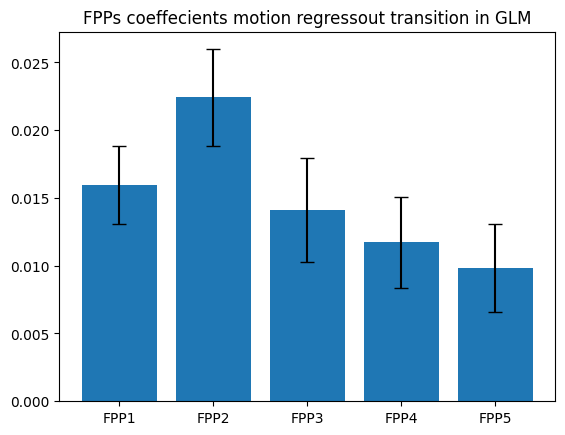

In [98]:
import matplotlib.pyplot as plt
plt.bar(np.arange(coefficients_regressor_motion.shape[0]), coefficients_regressor_motion, yerr=stderr_coefficients_regressor_motion, capsize=5)
plt.xticks(np.arange(5), ['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5'])
plt.title('FPPs coeffecients motion regressout transition in GLM')

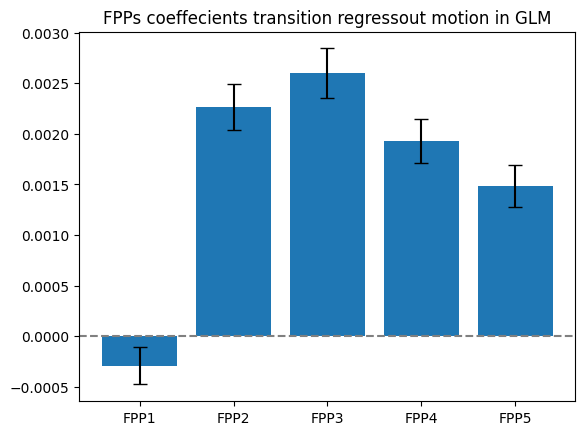

In [100]:
import matplotlib.pyplot as plt
plt.bar(np.arange(coefficients_regrssor_transition.shape[0]), coefficients_regrssor_transition,  yerr=stderr_coefficients_regrssor_transition, capsize=5)
plt.xticks(np.arange(5), ['FPP1', 'FPP2', 'FPP3', 'FPP4', 'FPP5'])
plt.title('FPPs coeffecients transition regressout motion in GLM')
plt.axhline(0, color='gray', linestyle='--')


# Correlation map significance eye movment and significance beta transition regressout motion

### significance correlation eye movment without medial

In [55]:
eye_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/eye_movment_data/final162.mat')['final162']

In [56]:
eye_data = eye_data.squeeze(0)

In [57]:
shift = 4
eye_regressor_shifted = np.roll(eye_data, shift)

In [65]:
right_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_right_Meanfile.mat')['Right_data']

corr_eye_movement_right = np.zeros(32492)
pvalue_corr_eye_movement_right = np.zeros(32492)
    
# Compute correlation and p-values
for i in range(32492):
    corr, p_value = stats.pearsonr(eye_regressor_shifted, right_data[i])
    corr_eye_movement_right[i] = corr
    pvalue_corr_eye_movement_right[i] = p_value
    
# Compute significance map
significance_correlation_eye_movement_regressor_right = -1 * np.log(pvalue_corr_eye_movement_right) * np.sign(corr_eye_movement_right)
significance_correlation_eye_movement_regressor_right = significance_correlation_eye_movement_regressor_right[~np.isnan(significance_correlation_eye_movement_regressor_right)]



C:\Users\roza\AppData\Local\Temp\ipykernel_95416\675194403.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = stats.pearsonr(eye_regressor_shifted, right_data[i])


In [64]:
corr_eye_movement_right[~np.isnan(corr_eye_movement_right)].shape

(29716,)

In [66]:
significance_correlation_eye_movement_regressor_right.shape

(29716,)

In [67]:
left_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/Movie_watching_avg_data/notmean_left_Meanfile.mat')['Left_data']

corr_eye_movement_left = np.zeros(32492)
pvalue_corr_eye_movement_left = np.zeros(32492)
    
# Compute correlation and p-values
for i in range(32492):
    corr, p_value = stats.pearsonr(eye_regressor_shifted, left_data[i])
    corr_eye_movement_left[i] = corr
    pvalue_corr_eye_movement_left[i] = p_value

# Compute significance map
significance_correlation_eye_movement_regressor_left = -1 * np.log(pvalue_corr_eye_movement_left) * np.sign(corr_eye_movement_left)
significance_correlation_eye_movement_regressor_left = significance_correlation_eye_movement_regressor_left[~np.isnan(significance_correlation_eye_movement_regressor_left)]

C:\Users\roza\AppData\Local\Temp\ipykernel_95416\2437332709.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = stats.pearsonr(eye_regressor_shifted, left_data[i])


In [68]:
significance_correlation_eye_movement_regressor_left.shape

(29696,)

In [69]:
significance_correlation_eye_movement_concat = np.concatenate((significance_correlation_eye_movement_regressor_right, significance_correlation_eye_movement_regressor_left))

### significance beta transition right and left concatenate

In [77]:
significance_beta_transition_right = -1* np.log(pvalue_coefficients_regrssor_transition_right) * np.sign(coefficients_regrssor_transition_right)
significance_beta_transition_left = -1* np.log(pvalue_coefficients_regrssor_transition_left) * np.sign(coefficients_regrssor_transition_left)

C:\Users\roza\AppData\Local\Temp\ipykernel_95416\222641183.py:1: RuntimeWarning: divide by zero encountered in log
  significance_beta_transition_right = -1* np.log(pvalue_coefficients_regrssor_transition_right) * np.sign(coefficients_regrssor_transition_right)
C:\Users\roza\AppData\Local\Temp\ipykernel_95416\222641183.py:1: RuntimeWarning: invalid value encountered in multiply
  significance_beta_transition_right = -1* np.log(pvalue_coefficients_regrssor_transition_right) * np.sign(coefficients_regrssor_transition_right)
C:\Users\roza\AppData\Local\Temp\ipykernel_95416\222641183.py:2: RuntimeWarning: divide by zero encountered in log
  significance_beta_transition_left = -1* np.log(pvalue_coefficients_regrssor_transition_left) * np.sign(coefficients_regrssor_transition_left)
C:\Users\roza\AppData\Local\Temp\ipykernel_95416\222641183.py:2: RuntimeWarning: invalid value encountered in multiply
  significance_beta_transition_left = -1* np.log(pvalue_coefficients_regrssor_transition_left)

In [78]:
significance_beta_transition_right = significance_beta_transition_right[~np.isnan(significance_beta_transition_right)]
significance_beta_transition_left = significance_beta_transition_left[~np.isnan(significance_beta_transition_left)]

In [79]:
significance_beta_transition_right.shape

(29716,)

In [80]:
significance_beta_transition_left.shape

(29696,)

In [81]:
significance_beta_transition_concat = np.concatenate((significance_beta_transition_right,significance_beta_transition_left))

In [82]:
significance_beta_transition_concat.shape

(59412,)

In [83]:
stats.pearsonr(significance_correlation_eye_movement_concat, significance_beta_transition_concat)

PearsonRResult(statistic=0.9334894263096265, pvalue=0.0)

Text(0.5, 1.0, 'sig bata transition and sig correlation eye movment')

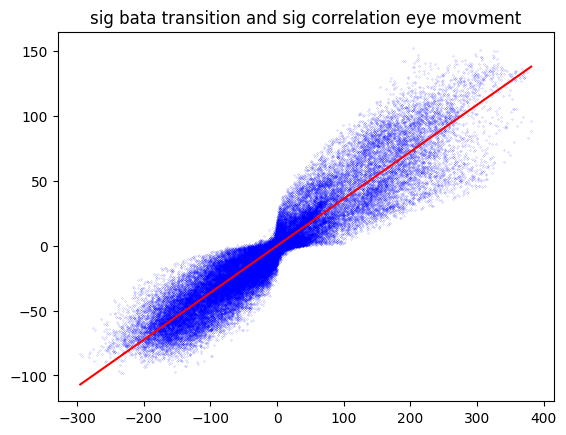

In [113]:
from scipy.stats import linregress

plt.scatter(significance_correlation_eye_movement_concat, significance_beta_transition_concat, s=0.01, c='blue')
slope, intercept, r_value, p_value, std_err = linregress(significance_correlation_eye_movement_concat, significance_beta_transition_concat)

# Create the fit line
fit_line_x = np.linspace(min(significance_correlation_eye_movement_concat), max(significance_correlation_eye_movement_concat), 100)
fit_line_y = slope * fit_line_x + intercept

# Plot the fit line
plt.plot(fit_line_x, fit_line_y, color='red', label=f'Fit line: y={slope:.2f}x+{intercept:.2f}')
plt.title('sig bata transition and sig correlation eye movment')


### significance beta motion concatenate right and left

In [85]:
significance_beta_motion_right = -1* np.log(pvalue_coefficients_regressor_motion_right) * np.sign(coefficients_regressor_motion_right)
significance_beta_motion_left = -1* np.log(pvalue_coefficients_regressor_motion_left) * np.sign(coefficients_regressor_motion_left)

C:\Users\roza\AppData\Local\Temp\ipykernel_95416\873628854.py:1: RuntimeWarning: divide by zero encountered in log
  significance_beta_motion_right = -1* np.log(pvalue_coefficients_regressor_motion_right) * np.sign(coefficients_regressor_motion_right)
C:\Users\roza\AppData\Local\Temp\ipykernel_95416\873628854.py:1: RuntimeWarning: invalid value encountered in multiply
  significance_beta_motion_right = -1* np.log(pvalue_coefficients_regressor_motion_right) * np.sign(coefficients_regressor_motion_right)
C:\Users\roza\AppData\Local\Temp\ipykernel_95416\873628854.py:2: RuntimeWarning: divide by zero encountered in log
  significance_beta_motion_left = -1* np.log(pvalue_coefficients_regressor_motion_left) * np.sign(coefficients_regressor_motion_left)
C:\Users\roza\AppData\Local\Temp\ipykernel_95416\873628854.py:2: RuntimeWarning: invalid value encountered in multiply
  significance_beta_motion_left = -1* np.log(pvalue_coefficients_regressor_motion_left) * np.sign(coefficients_regressor_mot

In [89]:
significance_beta_motion_right = significance_beta_motion_right[~np.isnan(significance_beta_motion_right)]
significance_beta_motion_left = significance_beta_motion_left[~np.isnan(significance_beta_motion_left)]

In [90]:
significance_beta_motion_concat = np.concatenate((significance_beta_motion_right,significance_beta_motion_left))

In [91]:
significance_beta_motion_concat.shape

(59412,)

In [92]:
stats.pearsonr(significance_correlation_eye_movement_concat, significance_beta_motion_concat)

PearsonRResult(statistic=0.7961993205800301, pvalue=0.0)

Text(0.5, 1.0, 'sig bata motion and sig correlation eye movment')

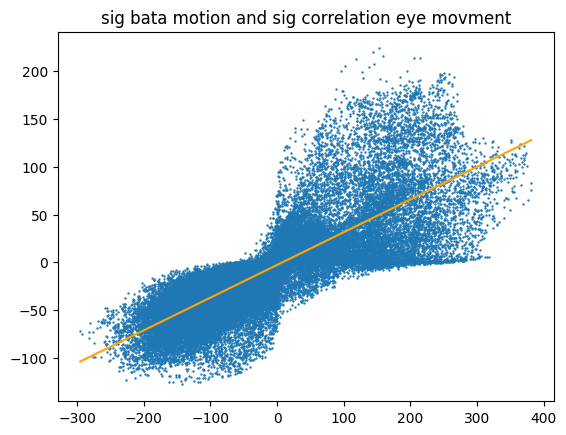

In [109]:
from scipy.stats import linregress

plt.scatter(significance_correlation_eye_movement_concat, significance_beta_motion_concat, s=0.5)
slope, intercept, r_value, p_value, std_err = linregress(significance_correlation_eye_movement_concat, significance_beta_motion_concat)

# Create the fit line
fit_line_x = np.linspace(min(significance_correlation_eye_movement_concat), max(significance_correlation_eye_movement_concat), 100)
fit_line_y = slope * fit_line_x + intercept

# Plot the fit line
plt.plot(fit_line_x, fit_line_y, color='orange', label=f'Fit line: y={slope:.2f}x+{intercept:.2f}')
plt.title('sig bata motion and sig correlation eye movment')


In [106]:
slope

0.34238714108286705

In [107]:
p_value

0.0